In [1]:
!wget https://raw.githubusercontent.com/raflidev/Machine-Learning-Case-Base-1/main/arrhythmia.csv

--2022-11-09 05:42:04--  https://raw.githubusercontent.com/raflidev/Machine-Learning-Case-Base-1/main/arrhythmia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412581 (403K) [text/plain]
Saving to: ‘arrhythmia.csv’

arrhythmia.csv      100%[===================>] 402.91K  --.-KB/s    in 0.03s   

2022-11-09 05:42:05 (11.3 MB/s) - ‘arrhythmia.csv’ saved [412581/412581]



## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## **Import Data dan Preprocesing data**



In [3]:
df = pd.read_csv('arrhythmia.csv', sep=",")
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
df = df[['age','sex','height','weight','QRSduration','PRinterval','Q-Tinterval','Tinterval','Pinterval','QRS','T','P','J','QRST','heartrate','chDI_Qwave','chDI_Rwave','chDI_Swave','chDI_RPwave','chDI_SPwave','chV6_QRSTA','class']]
df


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,J,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,NaN,-2.0,63.0,0,52,44,0,0,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,NaN,31.0,53.0,0,48,0,0,0,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,23.0,66.0,75.0,0,40,80,0,0,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,NaN,20.0,71.0,0,72,20,0,0,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,NaN,3.0,NaN,0,48,40,0,0,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,NaN,-27.0,63.0,0,52,24,0,0,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,NaN,79.0,73.0,0,44,36,0,0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,84.0,-70.0,84.0,16,40,40,0,0,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,103.0,43.0,80.0,0,56,0,0,0,46.6,1


In [5]:
df.isna().sum()

age              0
sex              0
height           0
weight           0
QRSduration      0
PRinterval       0
Q-Tinterval      0
Tinterval        0
Pinterval        0
QRS              0
T                8
P               22
J              376
QRST             1
heartrate        1
chDI_Qwave       0
chDI_Rwave       0
chDI_Swave       0
chDI_RPwave      0
chDI_SPwave      0
chV6_QRSTA       0
class            0
dtype: int64

In [6]:
df['T'].fillna(df['T'].mean(), inplace = True)
df['P'].fillna(df['P'].mean(), inplace = True)
df['QRST'].fillna(df['QRST'].mean(), inplace = True)
df['heartrate'].fillna(df['heartrate'].mean(), inplace = True)
df.drop(columns = ['J'], inplace = True)
df.isna().sum()

age            0
sex            0
height         0
weight         0
QRSduration    0
PRinterval     0
Q-Tinterval    0
Tinterval      0
Pinterval      0
QRS            0
T              0
P              0
QRST           0
heartrate      0
chDI_Qwave     0
chDI_Rwave     0
chDI_Swave     0
chDI_RPwave    0
chDI_SPwave    0
chV6_QRSTA     0
class          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          452 non-null    int64  
 1   sex          452 non-null    int64  
 2   height       452 non-null    int64  
 3   weight       452 non-null    int64  
 4   QRSduration  452 non-null    int64  
 5   PRinterval   452 non-null    int64  
 6   Q-Tinterval  452 non-null    int64  
 7   Tinterval    452 non-null    int64  
 8   Pinterval    452 non-null    int64  
 9   QRS          452 non-null    int64  
 10  T            452 non-null    float64
 11  P            452 non-null    float64
 12  QRST         452 non-null    float64
 13  heartrate    452 non-null    float64
 14  chDI_Qwave   452 non-null    int64  
 15  chDI_Rwave   452 non-null    int64  
 16  chDI_Swave   452 non-null    int64  
 17  chDI_RPwave  452 non-null    int64  
 18  chDI_SPwave  452 non-null    int64  
 19  chV6_QRS

In [8]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,64.0,-2.0,63.000000,0,52,44,0,0,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-17.0,31.0,53.000000,0,48,0,0,0,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,70.0,66.0,75.000000,0,40,80,0,0,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,-5.0,20.0,71.000000,0,72,20,0,0,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,61.0,3.0,74.463415,0,48,40,0,0,62.8,7


Memperbaiki data

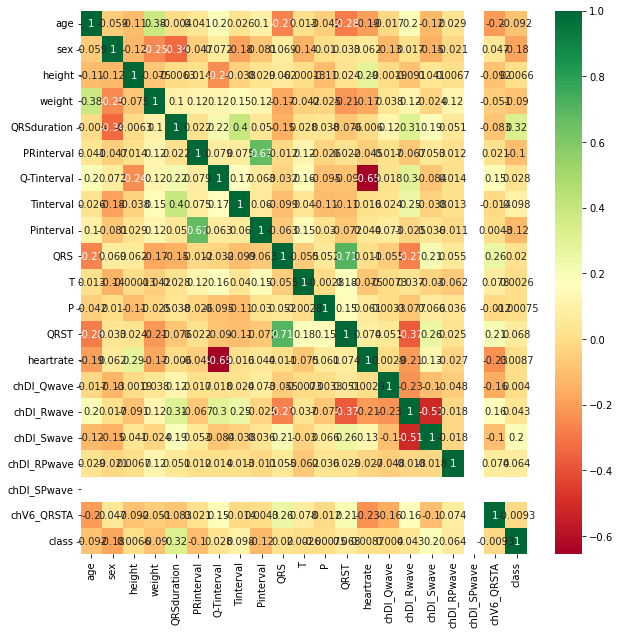

In [9]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
df = df.drop(['chDI_SPwave'], axis=1)

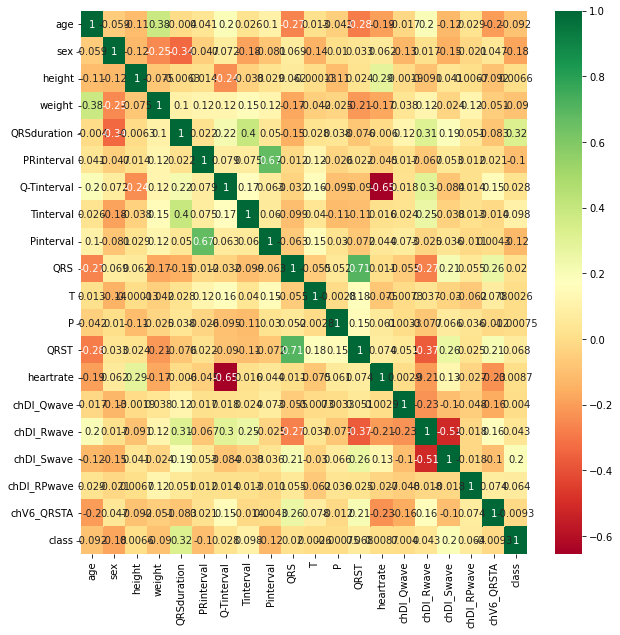

In [11]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
df['height'].value_counts().sort_index(ascending=False)

780     1
608     1
190     3
188     1
186     3
185     3
184     1
182     2
181     1
180     4
179     1
178     9
177     4
176    10
175    21
174     4
173     7
172    14
171     9
170    40
169     7
168    15
167     8
166     9
165    46
164     9
163    16
162    15
161     5
160    81
159     6
158     9
157    10
156    19
155    23
154     4
153     5
152     1
150     9
149     1
148     1
146     1
140     1
138     1
133     1
132     1
130     2
127     1
124     1
120     2
119     1
110     1
105     1
Name: height, dtype: int64

In [13]:
df.loc[df["height"] == 608, "height"] = 168
df.loc[df["height"] == 780, "height"] = 178
df['height'].value_counts().sort_index(ascending=False)

190     3
188     1
186     3
185     3
184     1
182     2
181     1
180     4
179     1
178    10
177     4
176    10
175    21
174     4
173     7
172    14
171     9
170    40
169     7
168    16
167     8
166     9
165    46
164     9
163    16
162    15
161     5
160    81
159     6
158     9
157    10
156    19
155    23
154     4
153     5
152     1
150     9
149     1
148     1
146     1
140     1
138     1
133     1
132     1
130     2
127     1
124     1
120     2
119     1
110     1
105     1
Name: height, dtype: int64

In [14]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          452 non-null    float64
 1   sex          452 non-null    float64
 2   height       452 non-null    float64
 3   weight       452 non-null    float64
 4   QRSduration  452 non-null    float64
 5   PRinterval   452 non-null    float64
 6   Q-Tinterval  452 non-null    float64
 7   Tinterval    452 non-null    float64
 8   Pinterval    452 non-null    float64
 9   QRS          452 non-null    float64
 10  T            452 non-null    float64
 11  P            452 non-null    float64
 12  QRST         452 non-null    float64
 13  heartrate    452 non-null    float64
 14  chDI_Qwave   452 non-null    float64
 15  chDI_Rwave   452 non-null    float64
 16  chDI_Swave   452 non-null    float64
 17  chDI_RPwave  452 non-null    float64
 18  chV6_QRSTA   452 non-null    float64
 19  class   

## **Train dan test data**



In [15]:
x = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]

normalisasi dengan min-max scaller

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, Y_test = train_test_split(x, y, train_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)

x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)

Training dengan ANN

In [22]:
from keras.models import Sequential  
from keras.layers import *  

model = Sequential() 
model.add(Dense(126, input_dim= 12,input_shape = ([16]), activation = 'relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))


model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 126)               2142      
                                                                 
 dense_6 (Dense)             (None, 64)                8128      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,895
Trainable params: 12,895
Non-trainable params: 0
_________________________________________________________________


Testing

In [24]:
history = model.fit(x_train_reduced, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 18.3119 - accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 3.7116 - accuracy: 0.0444
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: -0.0604 - accuracy: 0.1481
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: -4.8989 - accuracy: 0.4074
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: -8.1780 - accuracy: 0.5111
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: -15.4040 - accuracy: 0.5481
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: -19.3137 - accuracy: 0.5556
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: -23.5787 - accuracy: 0.5556
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: -26.5056 - accuracy: 0.5556
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: -30.2713 - accuracy: 0.5556
Epoch 11/10

Grafik Hasil Akurasi

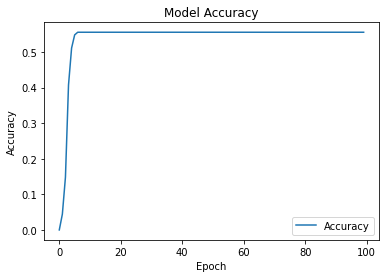

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Accuracy'], loc='lower right')
plt.show()

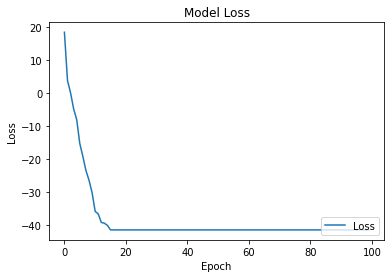

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Loss'], loc='lower right')
plt.show()